In [50]:
#This dataset contains a list of video games with sales greater than 100,000 copies. It was generated by a scrape of vgchartz.com.

In [51]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns

In [52]:
# Found and borrowed the Dataset from github user zhonglism
games = pd.read_csv('vgsales.csv') 
games[0:9]

,Rank,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales
0,1,Wii Sports,Wii,2006.0,Sports,Nintendo,41.49,29.02,3.77,8.46,82.74
1,2,Super Mario Bros.,NES,1985.0,Platform,Nintendo,29.08,3.58,6.81,0.77,40.24
2,3,Mario Kart Wii,Wii,2008.0,Racing,Nintendo,15.85,12.88,3.79,3.31,35.82
3,4,Wii Sports Resort,Wii,2009.0,Sports,Nintendo,15.75,11.01,3.28,2.96,33.00
4,5,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,Nintendo,11.27,8.89,10.22,1.00,31.37
5,6,Tetris,GB,1989.0,Puzzle,Nintendo,23.20,2.26,4.22,0.58,30.26
6,7,New Super Mario Bros.,DS,2006.0,Platform,Nintendo,11.38,9.23,6.50,2.90,30.01
7,8,Wii Play,Wii,2006.0,Misc,Nintendo,14.03,9.20,2.93,2.85,29.02
8,9,New Super Mario Bros. Wii,Wii,2009.0,Platform,Nintendo,14.59,7.06,4.70,2.26,28.62


**Data Cleaning**

In [53]:
data = games.drop(['Rank',],axis=1,inplace=True)
games.dropna(axis='rows', inplace=True)
games.Year = games.Year.astype(np.int64)


In [54]:
col = "Year"
max_x = games.loc[games[col].idxmax()]
print ("Maximum value of column ", col, " and its corresponding row values:\n", max_x)

Maximum value of column  Year  and its corresponding row values:
 Name            Imagine: Makeup Artist
Platform                            DS
Year                              2020
Genre                       Simulation
Publisher                      Ubisoft
NA_Sales                          0.27
EU_Sales                           0.0
JP_Sales                           0.0
Other_Sales                       0.02
Global_Sales                      0.29
Name: 5957, dtype: object


**Sorting the Games - offered on the MOST consoles to the LEAST**

In [55]:
Cross_Platform_Support = games.groupby('Name').agg({'Name':lambda x : len(x)})
Cross_Platform_Support.Name = Cross_Platform_Support.Name.astype(np.int64)
Cross_Platform_Support.columns = ['games_count']
Cross_Platform_Support.sort_values(['games_count'], ascending=False)

,games_count
Name,
Need for Speed: Most Wanted,12
Ratatouille,9
FIFA 14,9
LEGO Marvel Super Heroes,9
Angry Birds Star Wars,8
...,...
Inazuma Eleven 2,1
Inazuma Eleven GO,1
Inazuma Eleven GO 3: Galaxy,1


In [56]:
cols = ['Name','Genre','Publisher']
games.loc[games.Name=='Need for Speed: Most Wanted', cols]

,Name,Genre,Publisher
252,Need for Speed: Most Wanted,Racing,Electronic Arts
498,Need for Speed: Most Wanted,Racing,Electronic Arts
1173,Need for Speed: Most Wanted,Racing,Electronic Arts
1530,Need for Speed: Most Wanted,Racing,Electronic Arts
1742,Need for Speed: Most Wanted,Racing,Electronic Arts
2005,Need for Speed: Most Wanted,Racing,Electronic Arts
3585,Need for Speed: Most Wanted,Racing,Electronic Arts
5900,Need for Speed: Most Wanted,Racing,Electronic Arts
6149,Need for Speed: Most Wanted,Racing,Electronic Arts
6278,Need for Speed: Most Wanted,Racing,Electronic Arts


Text(0, 0.5, 'Global Sales')

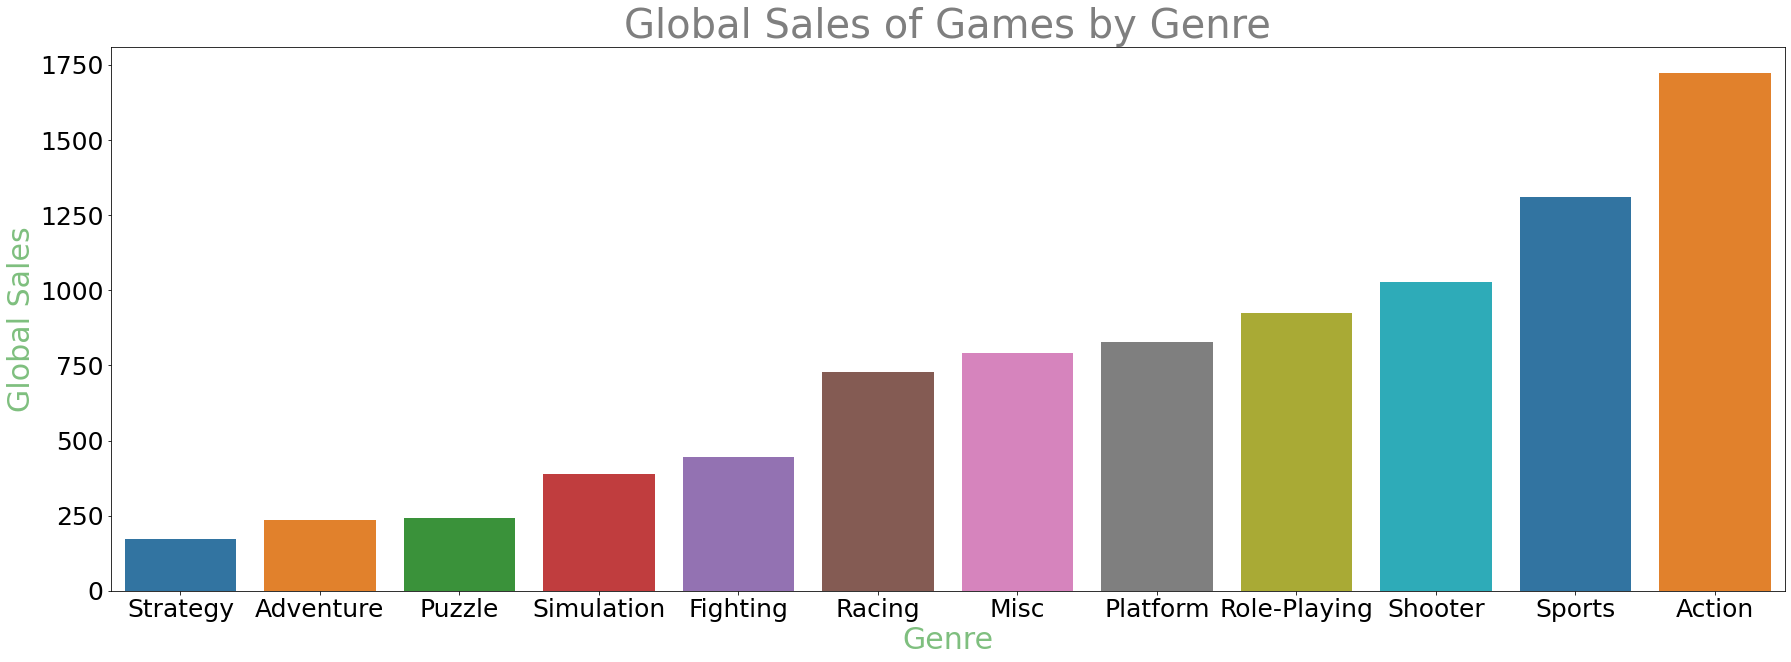

In [57]:
# Total sales based on Genre
global_sales_by_genre = games.groupby('Genre').agg({'Global_Sales':np.sum}).sort_values('Global_Sales')
plt.subplots(figsize=(30,10))
ax = sns.barplot(x=global_sales_by_genre.index, y=global_sales_by_genre.Global_Sales,palette=("tab10"))
ax.set_title('Global Sales of Games by Genre', color='black', size=40, alpha=0.5)
ax.set_xlabel('Genre', color='green', size=30, alpha=0.5)
ax.set_ylabel('Global Sales', color='green', size=30, alpha=0.5)

In [58]:
games[['Name', 'Platform','Year']].head(10).sort_values(['Year'], ascending=False)


,Name,Platform,Year
3,Wii Sports Resort,Wii,2009
8,New Super Mario Bros. Wii,Wii,2009
2,Mario Kart Wii,Wii,2008
0,Wii Sports,Wii,2006
6,New Super Mario Bros.,DS,2006
7,Wii Play,Wii,2006
4,Pokemon Red/Pokemon Blue,GB,1996
5,Tetris,GB,1989
1,Super Mario Bros.,NES,1985
9,Duck Hunt,NES,1984


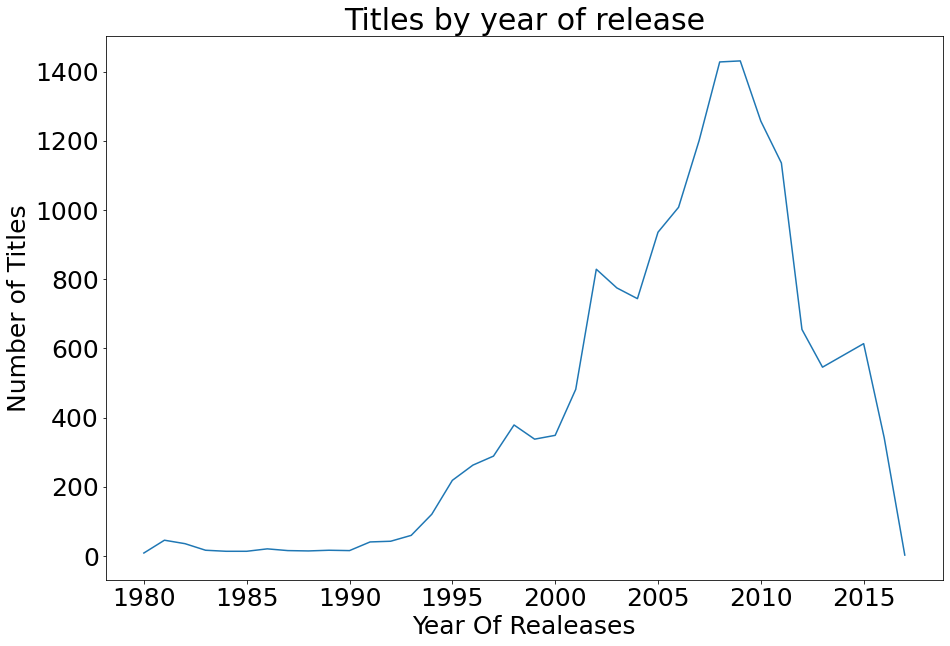

In [59]:
titles_by_year = games.groupby(['Year']).agg({'Name':lambda x : len(x) if (len(x) > 1) else None}).dropna()
plt.figure(figsize=(15,10))
_ = plt.plot(titles_by_year.index, titles_by_year.Name)
plt.rcParams['font.size'] = 18
plt.xlabel("Year Of Realeases")
plt.rcParams['font.size'] = 18
plt.ylabel("Number of Titles")
plt.rcParams['font.size'] = 25
plt.title("Titles by year of release")
plt.show()


Text(100.0, 0.5, 'Platform')

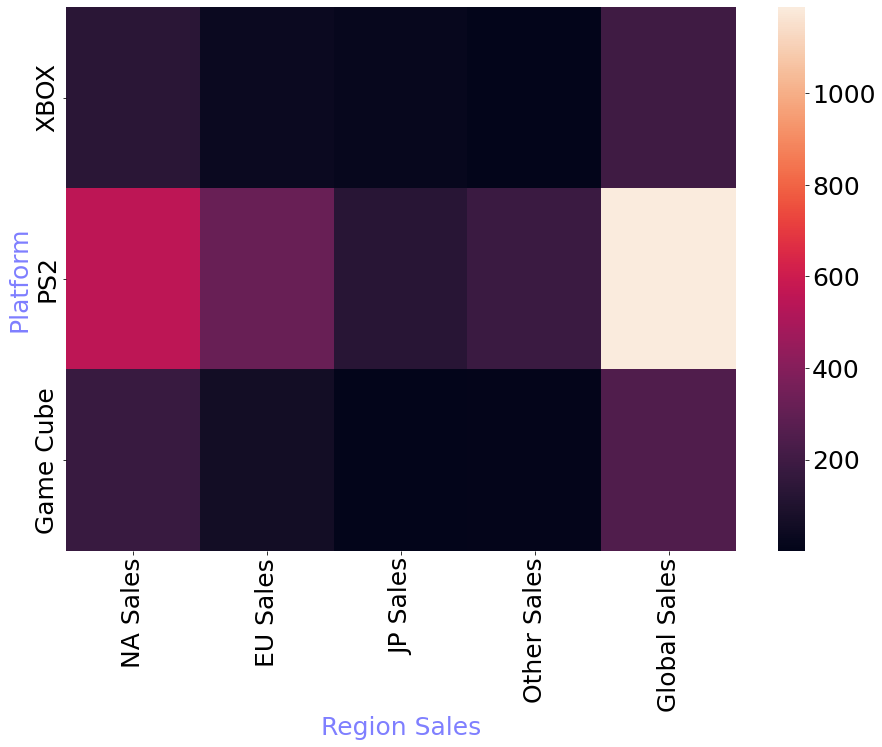

In [60]:
platform_after_2000_2010 = games.loc[((games.Platform == 'PS2') | (games.Platform == 'XB') | (games.Platform == 'GC')) & ((games.Year >= 2001) & (games.Year <= 2009)),:]
platform_after_2000_2010 = platform_after_2000_2010.groupby(['Platform']).agg(np.sum)
plt.subplots(figsize=(15,10))
ax = sns.heatmap(platform_after_2000_2010.iloc[:, 1:6])

ax.set_yticklabels(['XBOX', 'PS2', 'Game Cube'])
ax.set_xticklabels(['NA Sales', 'EU Sales', 'JP Sales', 'Other Sales', 'Global Sales'])
ax.set_xlabel('Region Sales', size=25, color='blue', alpha=0.5)
ax.set_ylabel('Platform', size=25, color='blue', alpha=0.5)